In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

In [83]:
RANDOM_PATH = "metrics-Random-agents-8-passengers-20.csv"
PATH_PLANNER_PATH = "metrics-PathPlanner-agents-15-passengers-15.csv"
QUADRANTS_PATH = "metrics-QuadrantsSocialConventions-agents-8-passengers-20.csv"
IDS_SOCIAL_CONV_PATH = "metrics-IDsSocialConventions-agents-8-passengers-20.csv"
ROLES_PATH = "metrics-Roles-agents-15-passengers-15.csv"

save = False

In [84]:
#random_data = pd.read_csv(RANDOM_PATH)
#random_data["agent"] = "Random"
path_planner_data = pd.read_csv(PATH_PLANNER_PATH)
path_planner_data["agent"] = "Path Planner"
#quadrants_data = pd.read_csv(QUADRANTS_PATH)
#quadrants_data["agent"] = "Quadrants"
#ids_social_conv_data = pd.read_csv(IDS_SOCIAL_CONV_PATH)
#ids_social_conv_data["agent"] = "Ids"
roles_social_data = pd.read_csv(ROLES_PATH)
roles_social_data["agent"] = "Roles"

In [85]:
#full_data = pd.concat((random_data, path_planner_data, quadrants_data, ids_social_conv_data, roles_social_data), ignore_index=True)
full_data = pd.concat((path_planner_data, roles_social_data), ignore_index=True)
full_data["travel_time"] = full_data["pick_up_time"] + full_data["drop_off_time"]
full_data

,taxi_distance,pick_up_time,drop_off_time,n_delivered,n_steps,agent,travel_time
0,12.466667,3.733333,8.600000,15,27,Path Planner,12.333333
1,13.933333,3.866667,8.933333,15,30,Path Planner,12.800000
2,13.600000,3.133333,8.866667,15,32,Path Planner,12.000000
3,13.800000,3.533333,8.466667,15,23,Path Planner,12.000000
4,13.400000,4.000000,8.733333,15,26,Path Planner,12.733333
...,...,...,...,...,...,...,...
195,9.533333,2.266667,8.266667,15,23,Roles,10.533333
196,10.733333,2.733333,9.000000,15,25,Roles,11.733333
197,11.000000,2.533333,9.466667,15,21,Roles,12.000000
198,11.400000,3.266667,9.133333,15,33,Roles,12.400000


In [86]:
data_without_random = full_data[full_data["agent"] != "Random"]
data_without_random

,taxi_distance,pick_up_time,drop_off_time,n_delivered,n_steps,agent,travel_time
0,12.466667,3.733333,8.600000,15,27,Path Planner,12.333333
1,13.933333,3.866667,8.933333,15,30,Path Planner,12.800000
2,13.600000,3.133333,8.866667,15,32,Path Planner,12.000000
3,13.800000,3.533333,8.466667,15,23,Path Planner,12.000000
4,13.400000,4.000000,8.733333,15,26,Path Planner,12.733333
...,...,...,...,...,...,...,...
195,9.533333,2.266667,8.266667,15,23,Roles,10.533333
196,10.733333,2.733333,9.000000,15,25,Roles,11.733333
197,11.000000,2.533333,9.466667,15,21,Roles,12.000000
198,11.400000,3.266667,9.133333,15,33,Roles,12.400000


Text(0, 0.5, 'Number of Steps')

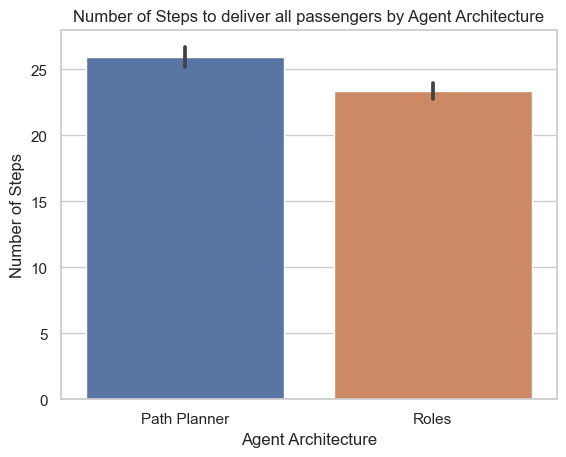

In [87]:
ax = plt.gca()
sns.barplot(x="agent", y="n_steps", ci=95, data=full_data, ax=ax)
ax.set_title("Number of Steps to deliver all passengers by Agent Architecture")
ax.set_xlabel("Agent Architecture")
ax.set_ylabel("Number of Steps")

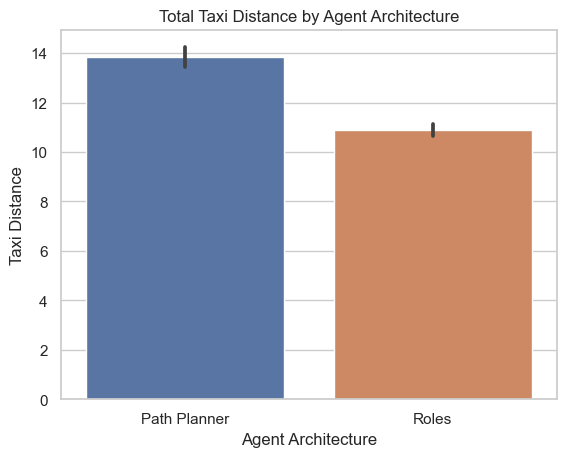

In [88]:
ax = plt.gca()
sns.barplot(x="agent", y="taxi_distance", ci=95, data=full_data, ax=ax)
ax.set_title("Total Taxi Distance by Agent Architecture")
ax.set_xlabel("Agent Architecture")
ax.set_ylabel("Taxi Distance")

if save:
    plt.savefig("taxi-distance.pdf")

<AxesSubplot:xlabel='agent', ylabel='drop_off_time'>

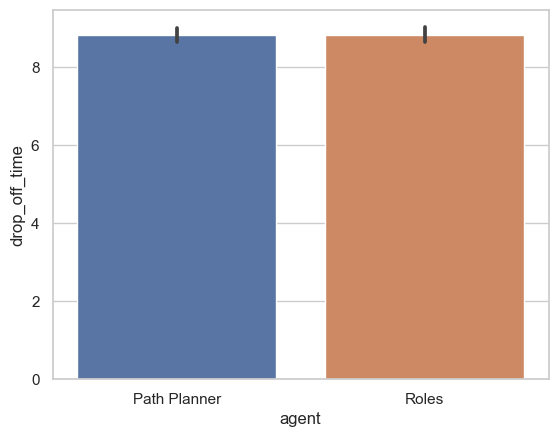

In [89]:
sns.barplot(x="agent", y="drop_off_time", ci=95, data=full_data)

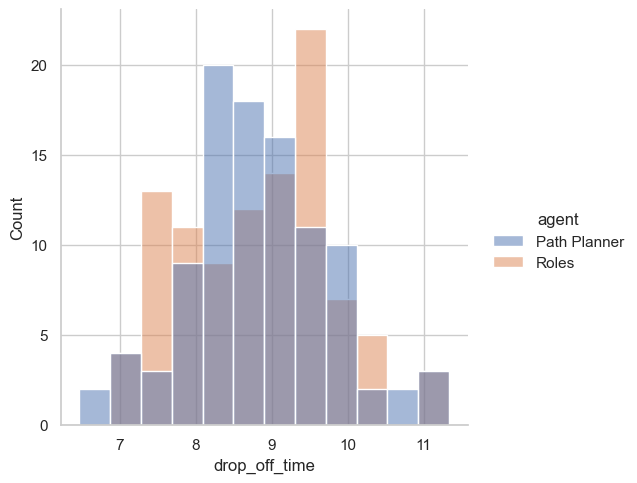

In [90]:
sns.displot(data_without_random, x="drop_off_time", hue="agent")